In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#load the dataset
dataset_train = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [0]:
dataset_train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [0]:
#processing data normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
#divided data into train and test
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0633
Epoch 2/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0080
Epoch 3/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0068
Epoch 4/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0060
Epoch 5/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0057
Epoch 6/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0058
Epoch 7/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0055
Epoch 8/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0048
Epoch 9/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0049
Epoch 10/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0049
Epoch 11/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0049
Epoch 12/100
1975/1975 [==============================] - 8s 4ms/step - l

In [0]:
#data testing
dataset_test = pd.read_csv('Test.csv')
real_traffic_volume = dataset_test.iloc[:, 1:2].values

In [0]:

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_traffic_volume = regressor.predict(X_test)
predicted_traffic_volume = sc.inverse_transform(predicted_traffic_volume)

TypeError: ignored

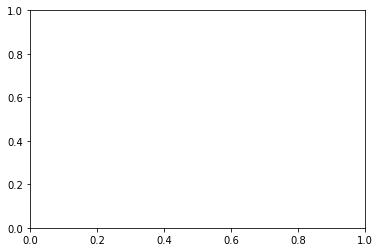

In [0]:
plt.plot(dataset_train)
